# Set up

In [3]:
import pandas as pd
import numpy as np
import os
import sys

In [4]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)
from recommender.utils import *

In [5]:
path_file = "/home/jose-manuel/repos/bert-movie-recommender/data/raw_data/movies_metadata.csv"
# Read the CSV file
# Use low_memory=False to avoid DtypeWarning
df = pd.read_csv(path_file, low_memory=False).drop_duplicates(subset=['imdb_id'])
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
# Check the number of rows and columns
print("unique id number:", len(df.id.unique()))
print("Shape df:" , df.shape)

unique id number: 45418
Shape df: (45418, 24)


In [7]:
df = df.filter(["id", "imdb_id", "original_title", "overview", "genres", "vote_average", "vote_count", "popularity"])
df.head()

,id,imdb_id,original_title,overview,genres,vote_average,vote_count,popularity
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",7.7,5415.0,21.946943
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,2413.0,17.015539
2,15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",6.5,92.0,11.7129
3,31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6.1,34.0,3.859495
4,11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",5.7,173.0,8.387519


In [8]:
df["genres"] = df["genres"].apply(get_genres)

# Model

In [9]:
from models.model import SentenceTransformerRecommender
from models.model import BertModelRecommender

/home/jose-manuel/repos/bert-movie-recommender/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
bert_model = BertModelRecommender(pooling_strategy='cls')

In [11]:
st_model = SentenceTransformerRecommender()

In [13]:
df = get_model_embeddings(df = df, model = st_model, output_col="st_embeddings")
df.head()

,id,imdb_id,original_title,overview,genres,vote_average,vote_count,popularity,st_embeddings
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",7.7,5415.0,21.946943,"[0.06343904137611389, 0.0010268535697832704, 0..."
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",6.9,2413.0,17.015539,"[0.08630581200122833, 0.044614922255277634, -0..."
2,15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]",6.5,92.0,11.7129,"[-0.10087595134973526, 0.03744182735681534, -0..."
3,31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]",6.1,34.0,3.859495,"[-0.055418968200683594, -0.014511915855109692,..."
4,11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],5.7,173.0,8.387519,"[-0.03138607740402222, -0.0693061426281929, 0...."


In [18]:
df = get_model_embeddings(df = df, model = bert_model, output_col="bert_embeddings")
df.head(2)

Encoding batches: 100%|██████████| 1420/1420 [08:12<00:00,  2.88it/s]


,id,imdb_id,original_title,overview,genres,vote_average,vote_count,popularity,st_embeddings,bert_embeddings
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",7.7,5415.0,21.946943,"[0.06343904137611389, 0.0010268535697832704, 0...","[-0.8164016008377075, 0.0019400811288505793, -..."
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",6.9,2413.0,17.015539,"[0.08630581200122833, 0.044614922255277634, -0...","[-0.5515234470367432, -0.21952839195728302, -0..."


Check the number of dimensions in each embedding column

In [ ]:
embedding = df.bert_embeddings.iloc[0]
embedding_cleaned = embedding.strip("[]")
embedding_list = [float(x) for x in embedding_cleaned.split(",")]
num_elements = len(embedding_list)
print(f"El número de elementos en el embedding es: {num_elements}")

El número de elementos en el embedding es: 768


In [35]:
embedding = df.st_embeddings.iloc[0]
embedding_cleaned = embedding.strip("[]")
embedding_list = [float(x) for x in embedding_cleaned.split(",")]
num_elements = len(embedding_list)
print(f"El número de elementos en el embedding es: {num_elements}")

El número de elementos en el embedding es: 384


In [57]:
#df.to_csv(path_file.replace("raw_data/movies_metadata.csv", "clean_data/movies_metadata_embeddings.csv"), index=False)
df = pd.read_csv(path_file.replace("raw_data/movies_metadata.csv", "clean_data/movies_metadata_embeddings.csv"))

# Calculate similarities

In [24]:
# Aplica la conversión a la columna de embeddings
df['bert_embeddings'] = df['bert_embeddings'].apply(parse_embedding)
df['st_embeddings'] = df['st_embeddings'].apply(parse_embedding)

In [12]:
embeddings = np.stack(df["st_embeddings"].values)
st_model.similarity(embeddings, embeddings)

tensor([[1.0000, 0.3099, 0.0994,  ..., 0.0125, 0.1920, 0.0985],
        [0.3099, 1.0000, 0.2149,  ..., 0.1592, 0.3955, 0.1750],
        [0.0994, 0.2149, 1.0000,  ..., 0.1871, 0.4305, 0.1305],
        ...,
        [0.0125, 0.1592, 0.1871,  ..., 1.0000, 0.2035, 0.1269],
        [0.1920, 0.3955, 0.4305,  ..., 0.2035, 1.0000, 0.2108],
        [0.0985, 0.1750, 0.1305,  ..., 0.1269, 0.2108, 1.0000]])

## Run new item (film)

In [25]:
new_film = """"Never Back Down" is a teen action-drama film that follows Jake Tyler, a hot-headed high school student who moves to a new town with his family after his younger brother earns a tennis scholarship. Struggling to fit in, Jake finds himself pulled into the underground world of mixed martial arts (MMA) after a violent encounter with a local fighter, Ryan McCarthy.
Humiliated and eager for redemption, Jake is taken under the wing of a wise MMA trainer, Jean Roqua, who teaches him discipline, control, and the true meaning of strength. As Jake trains both physically and mentally, he prepares to face his rival in a brutal showdown—not just for pride, but to prove to himself that he's more than his anger.
The film blends intense fight choreography with themes of self-growth, mentorship, and perseverance, making it a cult favorite among fans of martial arts and coming-of-age stories."""

### Bert

In [42]:
bert_model = BertModelRecommender(pooling_strategy='cls')

In [43]:
embeddings = np.stack(df["bert_embeddings"].values)
encode_new_film = bert_model.encode(new_film)

Encoding batches: 100%|██████████| 1/1 [00:00<00:00, 71.92it/s]


In [44]:
similarities = calculate_similarity(embeddings, encode_new_film)
similarities

array([0.72104996, 0.7359302 , 0.7132571 , ..., 0.65136856, 0.6981776 ,
       0.7232742 ], shape=(45418,), dtype=float32)

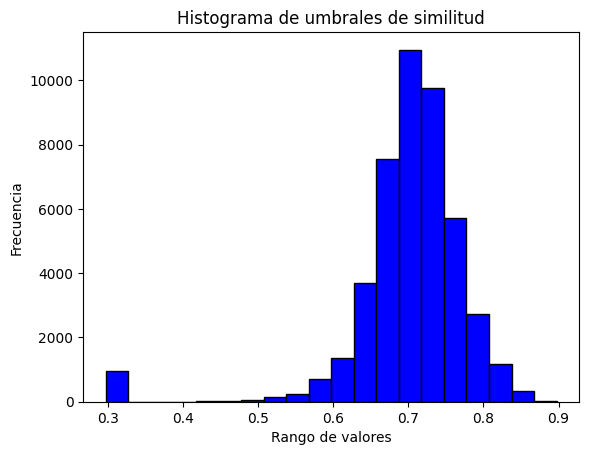

In [45]:
import matplotlib.pyplot as plt
import numpy as np


plt.hist(similarities, bins=20, color='blue', edgecolor='black')

plt.title("Histograma de umbrales de similitud")
plt.xlabel("Rango de valores")
plt.ylabel("Frecuencia")

plt.show()

In [46]:
index_max = np.argmax(similarities)
similarities[index_max]

np.float32(0.8974301)

In [47]:
df.iloc[index_max][["original_title", "overview"]]

original_title                                       I'm Still Here
overview          I'm Still Here is a portrayal of a tumultuous ...
Name: 15814, dtype: object

### Sentence Transformer model

In [16]:
embeddings = np.stack(df["st_embeddings"].values)
encode_new_film = st_model.encode(new_film)
df.iloc[np.argmax(calculate_similarity(embeddings, encode_new_film))][["original_title", "overview"]]

original_title                                      Never Back Down
overview          Rebellious Jake Tyler is lured into an ultimat...
Name: 12486, dtype: object

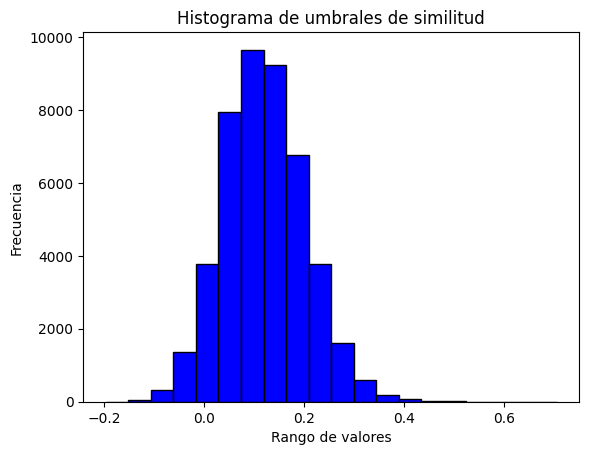

In [ ]:
similarities = calculate_similarity(embeddings, encode_new_film)

plt.hist(similarities, bins=20, color='blue', edgecolor='black')

plt.title("Histograma de umbrales de similitud")
plt.xlabel("Rango de valores")
plt.ylabel("Frecuencia")

plt.show()

We will use initially sentence transformer

In [64]:
df = pd.read_csv(path_file.replace("raw_data/movies_metadata.csv", "clean_data/movies_metadata_embeddings.csv"))

In [65]:
recommender = MovieRecommender(st_model, df, "st_embeddings")

In [66]:
recommender.get_recommendations(new_film, top_n=2, order_by="vote_average")

,original_title,overview,vote_average
12486,Never Back Down,Rebellious Jake Tyler is lured into an ultimat...,6.5
10757,Annapolis,"Jake Huard, from a shipbuilders family, promis...",6.0
